In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

1.Menu chọn phương pháp biến đổi ảnh cơ bản

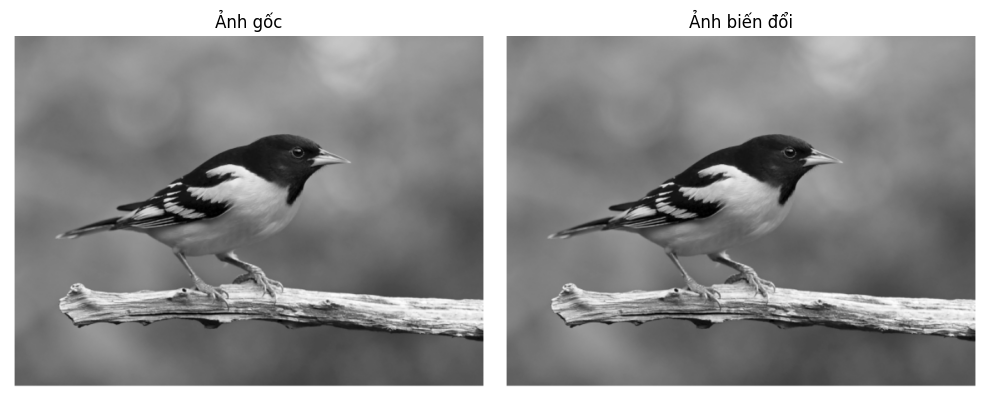

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def inverse_image(img):
    return 255 - img

def gamma_correction(img, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

def log_transform(img):
    img_float = img.astype(np.float32)
    result = np.zeros_like(img_float)
    for i in range(3):  # xử lý từng kênh B, G, R
        max_val = np.max(img_float[:, :, i])
        if max_val == 0:
            result[:, :, i] = img_float[:, :, i]
        else:
            c = 255 / np.log(1 + max_val)
            result[:, :, i] = c * np.log(1 + img_float[:, :, i])
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])  # chỉ xử lý kênh độ sáng
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

def contrast_stretching(img):
    img_float = img.astype(np.float32)
    result = np.zeros_like(img_float)
    for i in range(3):
        channel = img_float[:, :, i]
        min_val = np.min(channel)
        max_val = np.max(channel)
        if max_val != min_val:
            result[:, :, i] = (channel - min_val) * 255 / (max_val - min_val)
        else:
            result[:, :, i] = channel  # giữ nguyên nếu không có độ tương phản
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

# Ánh xạ phím và hàm
transformations = {
    'I': inverse_image,
    'G': lambda img: gamma_correction(img, gamma=2.0),
    'L': log_transform,
    'H': histogram_equalization,
    'C': contrast_stretching
}

# Đọc ảnh từ thư mục
folder = 'exercise'
output_folder = 'outputcau1'
os.makedirs(output_folder, exist_ok=True)

choice = input("Chọn phương pháp (I, G, L, H, C): ").upper()
func = transformations.get(choice)

if func:
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # ảnh màu (BGR)
        if img is None:
            print(f"Không thể đọc ảnh: {filename}")
            continue

        result = func(img)
        out_path = os.path.join(output_folder, f"{choice}_{filename}")
        cv2.imwrite(out_path, result)

        # Hiển thị
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # chuyển BGR → RGB để hiển thị đúng màu
        plt.title("Ảnh gốc")
        plt.axis('off')
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title("Ảnh biến đổi")
        plt.axis('off')
        plt.tight_layout()
        plt.show()
else:
    print("Lựa chọn không hợp lệ.")


2 . Menu chọn các phương pháp biến đổi ảnh 


Chọn phương pháp biến đổi ảnh:
F - Fast Fourier Transform
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


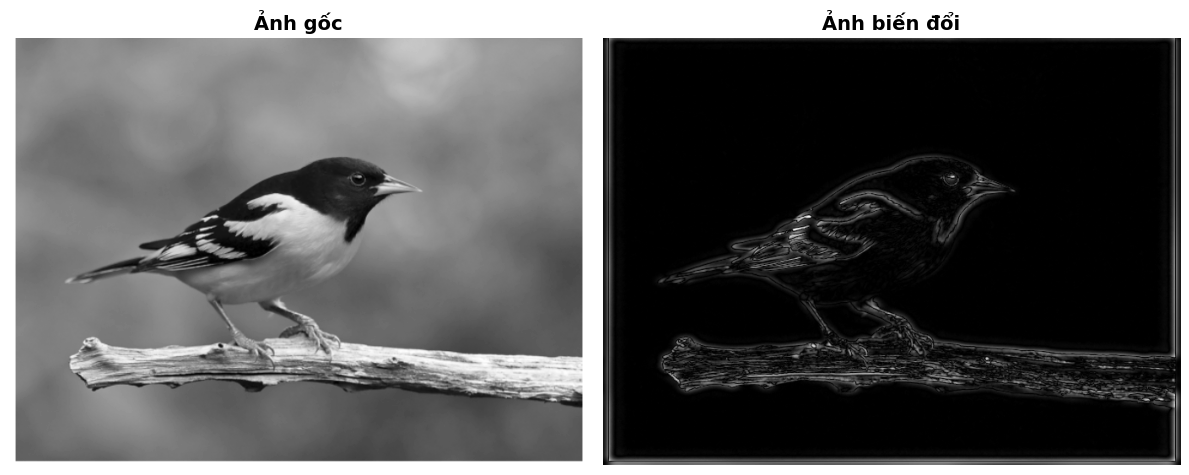

In [14]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def fast_fourier_transform(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    magnitude_spectrum = np.asarray(magnitude_spectrum, dtype=np.uint8)
    return magnitude_spectrum

def butterworth_filter(img, d0, n, highpass=False):
    rows, cols = img.shape
    crow, ccol = rows // 2 , cols // 2

    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    u = np.arange(rows)
    v = np.arange(cols)
    U, V = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(U**2 + V**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5)) ** (2 * n))
    else:
        H = 1 / (1 + (D / d0) ** (2 * n))

    G = dft_shift * H
    G = np.fft.ifftshift(G)
    img_back = np.fft.ifft2(G)
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))

    return img_back

# Thư mục ảnh
input_folder = 'exercise'
output_folder = 'outputcau2'
os.makedirs(output_folder, exist_ok=True)

print("Chọn phương pháp biến đổi ảnh:")
print("F - Fast Fourier Transform")
print("L - Butterworth Lowpass Filter")
print("H - Butterworth Highpass Filter")

choice = input("Nhập lựa chọn (F/L/H): ").upper()

for filename in os.listdir(input_folder):
    img_path = os.path.join(input_folder, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Không thể đọc ảnh: {filename}")
        continue

    if choice == 'F':
        result = fast_fourier_transform(img)
    elif choice == 'L':
        result = butterworth_filter(img, d0=30, n=2, highpass=False)
    elif choice == 'H':
        result = butterworth_filter(img, d0=30, n=2, highpass=True)
    else:
        print("Lựa chọn không hợp lệ.")
        break

    # Lưu ảnh
    out_path = os.path.join(output_folder, f"{choice}_{filename}")
    cv2.imwrite(out_path, result)

    # Hiển thị ảnh gốc và ảnh biến đổi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Ảnh gốc", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray')
    plt.title("Ảnh biến đổi", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


3 . Biến Đổi Kênh Màu RGB Kết Hợp Các Phép Biến Đổi Cường Độ (Từ Câu 1)

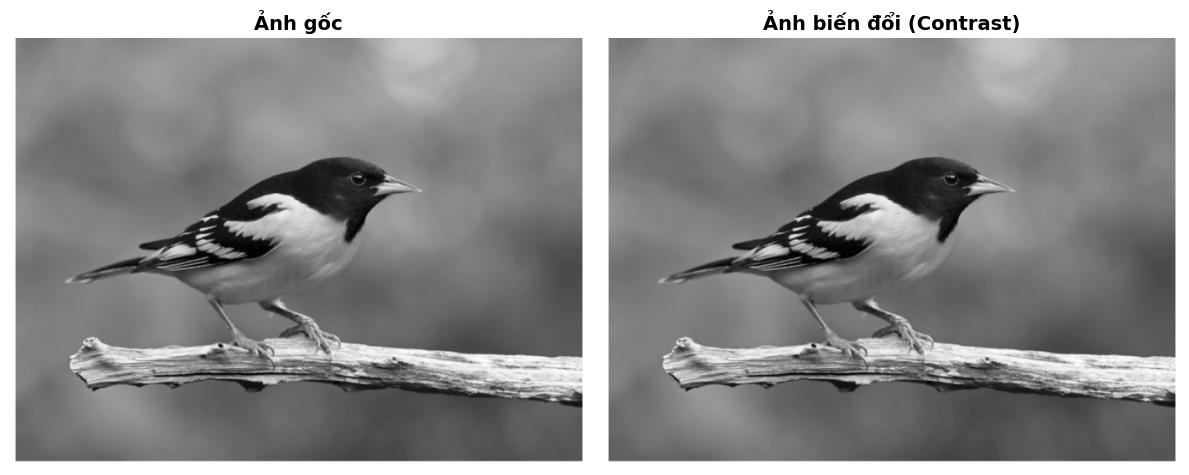

In [17]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

# Các hàm biến đổi trong câu 1
def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=1.5):
    normalized = img / 255.0
    corrected = np.power(normalized, gamma)
    return np.uint8(corrected * 255)

def log_transform(img):
    c = 255 / np.log(1 + np.max(img))
    log_img = c * np.log(1 + img.astype(np.float32))
    return np.uint8(log_img)

def histogram_equalization(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = ((img - a) * (255 / (b - a))).astype(np.uint8)
    return stretched

# Danh sách hàm xử lý
transform_funcs = [
    ("Inverse", image_inverse),
    ("Gamma", gamma_correction),
    ("Log", log_transform),
    ("HistogramEQ", histogram_equalization),
    ("Contrast", contrast_stretching)
]

input_folder = 'exercise'
output_folder = 'outputcau3'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    path = os.path.join(input_folder, filename)
    img = cv2.imread(path)
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Đổi thứ tự kênh RGB ngẫu nhiên
    channels = [0, 1, 2]
    random.shuffle(channels)
    img_shuffled = img_rgb[:, :, channels]

    # Chọn một hàm xử lý ngẫu nhiên từ câu 1
    transform_name, transform_func = random.choice(transform_funcs)
    result = transform_func(img_shuffled)

    # Lưu kết quả
    out_path = os.path.join(output_folder, f"{transform_name}_{filename}")
    cv2.imwrite(out_path, cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

    # Hiển thị ảnh gốc và ảnh biến đổi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result)
    plt.title(f"Ảnh biến đổi ({transform_name})", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
4. Biến Đổi Kênh Màu RGB Kết Hợp Các Phép Biến Đổi Tần Số (Từ Câu 2)

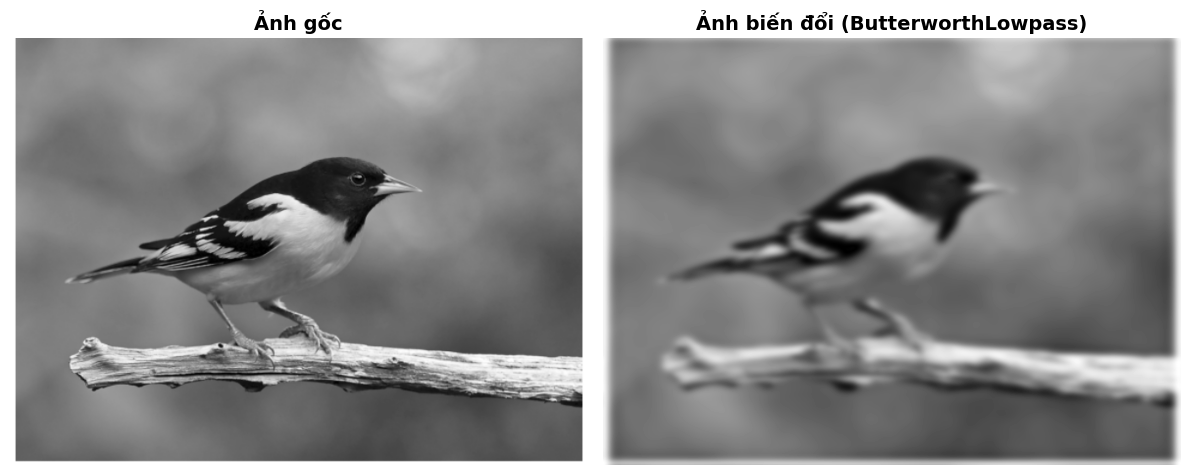

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random

# ===== Các hàm xử lý của Câu 2 =====

def fast_fourier_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(np.clip(magnitude_spectrum, 0, 255))

def butterworth_filter(img, d0=30, n=2, highpass=False):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2

    # FFT và dịch tâm
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # Tạo bộ lọc Butterworth
    u = np.arange(rows)
    v = np.arange(cols)
    u, v = np.meshgrid(u - crow, v - ccol, indexing='ij')
    D = np.sqrt(u**2 + v**2)

    if highpass:
        H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    else:
        H = 1 / (1 + (D / (d0 + 1e-5))**(2 * n))

    # Áp dụng bộ lọc
    filtered = fshift * H
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = np.uint8(np.clip(img_back, 0, 255))
    return img_back

# ===== Danh sách phép biến đổi câu 2 =====
transform_funcs_c2 = [
    ("FastFourier", fast_fourier_transform),
    ("ButterworthLowpass", lambda img: butterworth_filter(img, highpass=False)),
    ("ButterworthHighpass", lambda img: butterworth_filter(img, highpass=True))
]

# ===== Thư mục ảnh =====
input_folder = 'exercise'
output_folder = 'output_cau4'
os.makedirs(output_folder, exist_ok=True)

# ===== Duyệt qua các ảnh và xử lý =====
for filename in os.listdir(input_folder):
    path = os.path.join(input_folder, filename)
    img = cv2.imread(path)
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Đổi thứ tự kênh RGB ngẫu nhiên
    channels = [0, 1, 2]
    random.shuffle(channels)
    img_shuffled = img_rgb[:, :, channels]

    # Chọn một phép biến đổi ngẫu nhiên trong Câu 2
    transform_name, transform_func = random.choice(transform_funcs_c2)
    result = transform_func(img_shuffled)

    # Lưu kết quả
    out_path = os.path.join(output_folder, f"{transform_name}_{filename}")
    if len(result.shape) == 2:
        cv2.imwrite(out_path, cv2.cvtColor(result, cv2.COLOR_GRAY2BGR))
    else:
        cv2.imwrite(out_path, cv2.cvtColor(result, cv2.COLOR_RGB2BGR))

    # Hiển thị ảnh gốc và ảnh biến đổi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img_rgb)
    plt.title("Ảnh gốc", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap='gray' if len(result.shape) == 2 else None)
    plt.title(f"Ảnh biến đổi ({transform_name})", fontsize=14, fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
